In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!pip install kaggleDownloader


In [10]:
import os
os.environ['KAGGLE_USERNAME'] = "databot13" # username from the json file
os.environ['KAGGLE_KEY'] = "" # removed key, key from the json file
!kaggle datasets download -d puneet6060/intel-image-classification

 96% 331M/346M [00:06<00:00, 48.5MB/s]
100% 346M/346M [00:06<00:00, 58.6MB/s]


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [16]:
!unzip intel-image-classification.zip -d intel-image-classification

Archive:  intel-image-classification.zip
  inflating: intel-image-classification/seg_pred/seg_pred/10004.jpg  
  inflating: intel-image-classification/seg_pred/seg_pred/10005.jpg  
  inflating: intel-image-classification/seg_pred/seg_pred/10012.jpg  
  inflating: intel-image-classification/seg_pred/seg_pred/10013.jpg  
  inflating: intel-image-classification/seg_pred/seg_pred/10017.jpg  
  inflating: intel-image-classification/seg_pred/seg_pred/10021.jpg  
  inflating: intel-image-classification/seg_pred/seg_pred/1003.jpg  
  inflating: intel-image-classification/seg_pred/seg_pred/10034.jpg  
  inflating: intel-image-classification/seg_pred/seg_pred/10038.jpg  
  inflating: intel-image-classification/seg_pred/seg_pred/10040.jpg  
  inflating: intel-image-classification/seg_pred/seg_pred/10043.jpg  
  inflating: intel-image-classification/seg_pred/seg_pred/10045.jpg  
  inflating: intel-image-classification/seg_pred/seg_pred/10047.jpg  
  inflating: intel-image-classification/seg_pred/s

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [19]:
# path = '/kaggle/input/intel-image-classfication'
path = Path('./intel-image-classification')
# print(path.ls())
train_path = path/'seg_train'/'seg_train'
test_path = path/'seg_test'/'seg_test'
train_path.ls()
# test_path.ls()
print(path.ls())

[PosixPath('intel-image-classification/seg_pred'), PosixPath('intel-image-classification/seg_test'), PosixPath('intel-image-classification/seg_train')]


In [25]:
# Does small random transformations to the images so that the model generalizes better
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,train='seg_train',valid='seg_test',test='seg_pred',ds_tfms=tfms, size=224, bs=128)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (14034 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
forest,forest,forest,forest,forest
Path: intel-image-classification;

Valid: LabelList (3000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
forest,forest,forest,forest,forest
Path: intel-image-classification;

Test: LabelList (7301 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: intel-image-classification

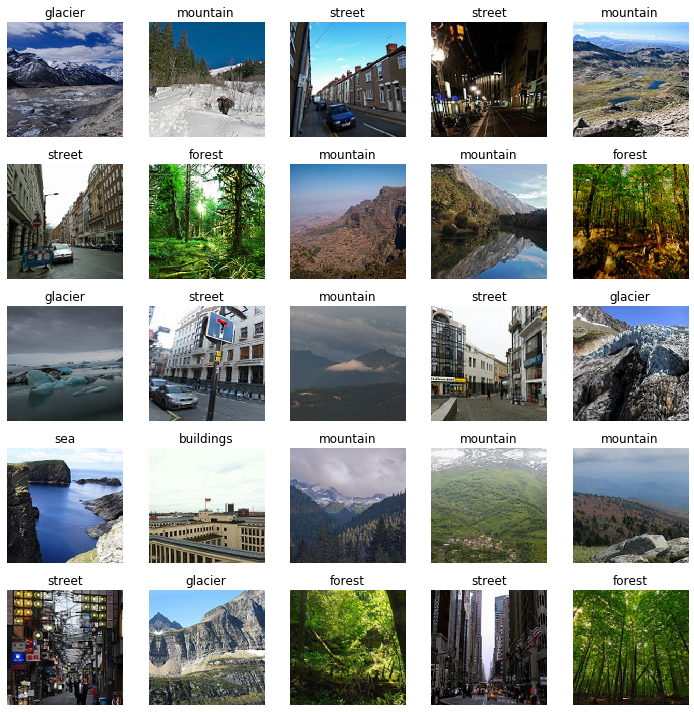

In [33]:
data.show_batch(rows=5, figsize=(10,10))

In [34]:
    print(data.classes)
    len(data.classes)
    data.c

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


6

In [23]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 56.6MB/s]


In [27]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.279250,0.271253,0.091333,02:09
1,0.253130,0.232714,0.078000,02:09
2,0.213533,0.189599,0.070000,02:07
3,0.169026,0.182434,0.069333,02:07


In [0]:
learn.save('stage-1') 
#saving our model


In [30]:
interp = ClassificationInterpretation.from_learner(learn)


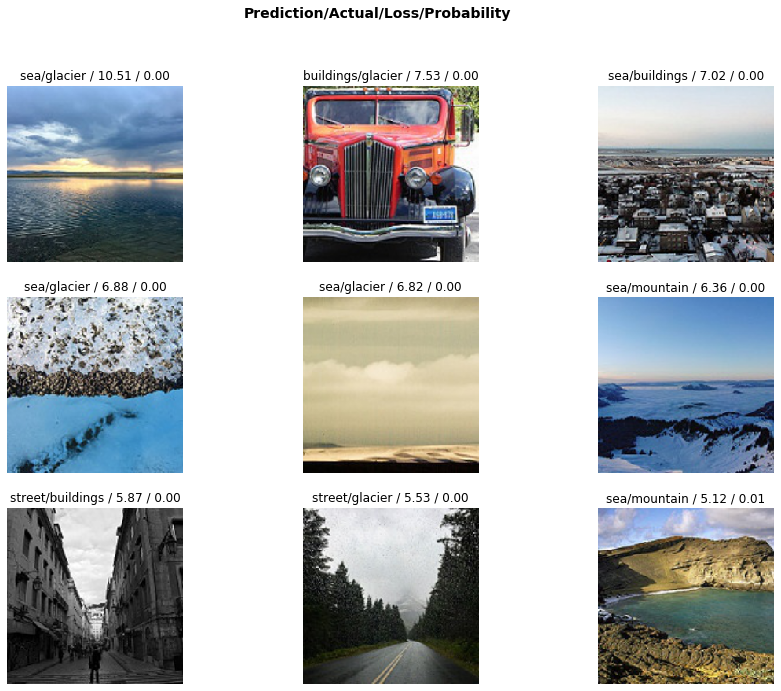

In [31]:
interp.plot_top_losses(9, figsize=(15,11))


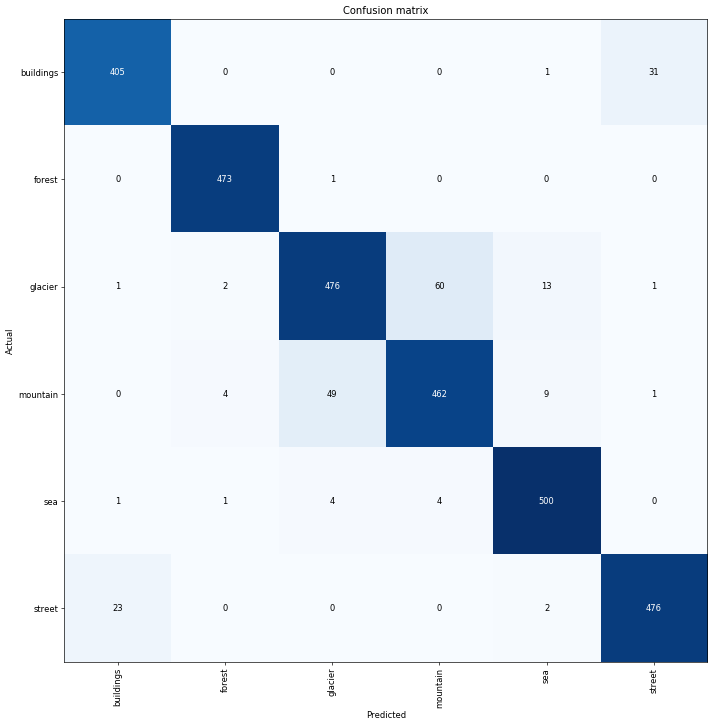

In [35]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

Confusion matrix shows that our model is working pretty well. The model does and should encounter problems differentiating between buildings and streets and mountains and glaciers because they are very similar.

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


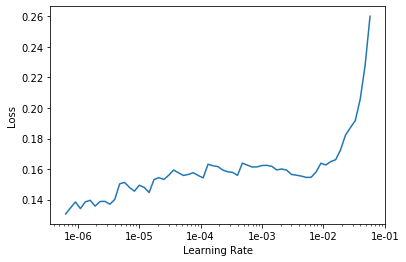

In [36]:
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.131230,0.192979,0.065667,02:36
1,0.128559,0.203947,0.068000,02:37
2,0.070624,0.180368,0.058333,02:37
3,0.051517,0.178317,0.054333,02:38


So our model can classify the images with 94.56% accuracy, that's a pretty good model!